In [1]:
import sys; sys.path.insert(0, '..') # necessary for successful custom module imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models.jump_vasicek import JumpVasicek
from models.vasicek import Vasicek
from evaluators.monte_carlo import MonteCarlo

In [2]:
model_params = {
    "kappa": 0.5,
    "mu_r": 0.06,
    "sigma": 0.02,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}

In [3]:
jump_vasicek = JumpVasicek(model_params)
mc_jump_vasicek = MonteCarlo(jump_vasicek)

In [4]:
T = np.arange(1, 21)
prices_class = np.empty(len(T))
std_class = np.empty(len(T))
prices_anti = np.empty(len(T))
std_anti = np.empty(len(T))
prices_cv = np.empty(len(T))
std_cv = np.empty(len(T))
prices_cv_anti = np.empty(len(T))
std_cv_anti = np.empty(len(T))

In [5]:
for t in T:
    prices_class[t-1], std_class[t-1] = mc_jump_vasicek._simulate_paths(m=104, r0=0.04, n=100, T=t)
    prices_anti[t-1], std_anti[t-1] = mc_jump_vasicek._simulate_paths_anti(m=104, r0=0.04, n=100, T=t)
    prices_cv[t-1], std_cv[t-1] = mc_jump_vasicek._simulate_paths_cv(m=104, r0=0.04, n=100, T=t, exact_model_class=Vasicek)
    prices_cv_anti[t-1], std_cv_anti[t-1] = mc_jump_vasicek._simulate_paths_cv_anti(m=104, r0=0.04, n=100, T=t, exact_model_class=Vasicek)

<AxesSubplot:xlabel='Year'>

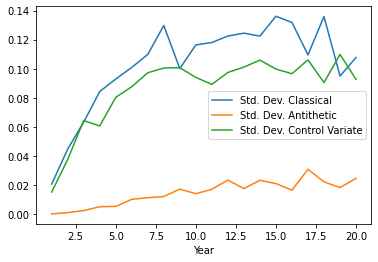

In [6]:
std_df = pd.concat([pd.Series(std_class), pd.Series(std_anti), pd.Series(std_cv)], axis=1)
std_df.index = pd.Index(T, name="Year")
std_df.columns = ["Std. Dev. Classical", "Std. Dev. Antithetic", "Std. Dev. Control Variate"]
std_df.plot()

<AxesSubplot:xlabel='Year'>

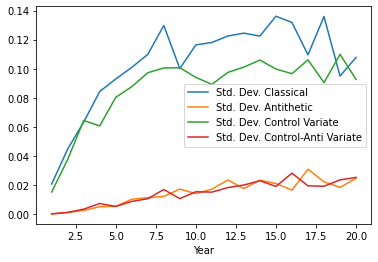

In [7]:
std_df = pd.concat([pd.Series(std_class), pd.Series(std_anti), pd.Series(std_cv), pd.Series(std_cv_anti)], axis=1)
std_df.index = pd.Index(T, name="Year")
std_df.columns = ["Std. Dev. Classical", "Std. Dev. Antithetic", "Std. Dev. Control Variate", "Std. Dev. Control-Anti Variate"]
std_df.plot()

In [8]:
std_df/std_df['Std. Dev. Classical'].values.reshape((20, 1))

,Std. Dev. Classical,Std. Dev. Antithetic,Std. Dev. Control Variate,Std. Dev. Control-Anti Variate
Year,,,,
1,1.0,0.011963,0.736671,0.009229
2,1.0,0.025310,0.840314,0.028223
3,1.0,0.040170,1.017276,0.054864
4,1.0,0.061384,0.719569,0.087197
5,1.0,0.058319,0.864686,0.057048
6,1.0,0.101793,0.868460,0.086932
7,1.0,0.103442,0.885084,0.096762
8,1.0,0.094007,0.774739,0.130916
9,1.0,0.172835,1.006147,0.106824
